<a href="https://colab.research.google.com/github/eeolga/article/blob/main/Predictive_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split



file_path = '/content/updated_merged_data_16102024.xlsx'
data = pd.read_excel(file_path)
display(pd.DataFrame(data))




,timestamp,userid,toolid,activityid,competency_weight,tool_weight,activity_weight,log_weight,performance,attainment
0,"1/02/24, 10:46:00",18630,233150,10503,0.0152,0.0370,0.0543,0.00300,0.004403,1
1,"1/03/24, 09:50:22",21041,233162,20807,0.0455,0.1111,0.1628,0.00400,0.005861,1
2,"1/03/24, 09:50:32",21041,233162,20807,0.0455,0.1111,0.1628,0.00400,0.005861,1
3,"1/03/24, 09:50:37",21041,256461,30807,0.0606,0.1481,0.2171,0.00400,0.005864,1
4,"1/03/24, 09:57:15",21041,256461,30807,0.0606,0.1481,0.2171,0.00400,0.005864,1
...,...,...,...,...,...,...,...,...,...,...
7470,"9/05/24, 16:09:17",29275,233172,10403,0.0303,0.0370,0.0715,0.00556,0.010744,1
7471,"9/05/24, 16:09:24",29275,256461,20807,0.0455,0.1111,0.1628,0.00556,0.008147,1
7472,"9/06/24, 00:22:05",26342,233144,10303,0.0152,0.0370,0.0543,0.01520,0.022307,0
7473,"9/06/24, 21:31:13",26502,258703,40807,0.0758,0.1852,0.2714,0.00270,0.003957,1


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
X_train_lstm = torch.Tensor(X_train_lstm)
y_train_lstm = torch.Tensor(y_train_lstm)
X_test_lstm = torch.Tensor(X_test_lstm)
y_test_lstm = torch.Tensor(y_test_lstm)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate the LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Decode the last output of LSTM to prediction
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters
input_size = len(features)  # Number of features
hidden_size = 50            # Number of LSTM units
num_layers = 2              # Number of stacked LSTM layers
output_size = 1             # Predicting a single value (performance)
learning_rate = 0.001
num_epochs = 100

# Initialize the model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
X_train_lstm, y_train_lstm = X_train_lstm.to(device), y_train_lstm.to(device)
X_test_lstm, y_test_lstm = X_test_lstm.to(device), y_test_lstm.to(device)


In [ ]:
# Training the model
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_lstm)
    loss = criterion(outputs, y_train_lstm.unsqueeze(1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# After training, evaluate on test set
model.eval()
with torch.no_grad():
    predictions = model(X_test_lstm)
    test_loss = criterion(predictions, y_test_lstm.unsqueeze(1))
    print(f'Test Loss: {test_loss.item():.4f}')


Epoch [10/100], Loss: 0.0020
Epoch [20/100], Loss: 0.0019
Epoch [30/100], Loss: 0.0019
Epoch [40/100], Loss: 0.0019
Epoch [50/100], Loss: 0.0019
Epoch [60/100], Loss: 0.0018
Epoch [70/100], Loss: 0.0018
Epoch [80/100], Loss: 0.0018
Epoch [90/100], Loss: 0.0018
Epoch [100/100], Loss: 0.0018
Test Loss: 0.0056


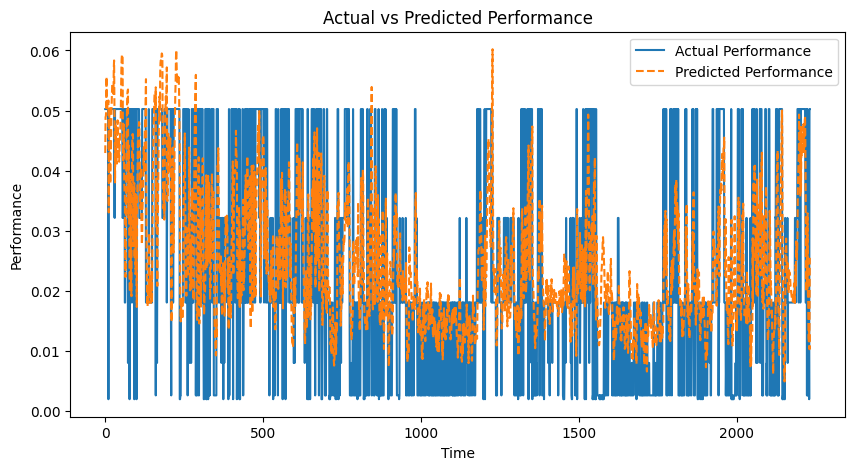

In [ ]:
import matplotlib.pyplot as plt

# Convert predictions and actual values back to NumPy for plotting
predictions = predictions.cpu().numpy()
y_test_lstm = y_test_lstm.cpu().numpy()

# Plot the predictions and actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test_lstm, label='Actual Performance')
plt.plot(predictions, label='Predicted Performance', linestyle='--')
plt.title('Actual vs Predicted Performance')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()
